- [<Step1. 탐색> : 데이터의 기초 정보 살펴보기](#<Step1.-탐색>-:-데이터의-기초-정보-살펴보기)
    - [Chipotle 데이터셋의 기본 정보]
    - [Chipotle 데이터셋의 행과 열, 데이터]
    - [Chipotle 데이터셋의 수치적 특징 파악]

- [<Step3. 데이터 전처리> : 나만의 조력자를 정의하자](#<Step3.-데이터-전처리>-:-나만의-조력자를-정의하자)
    - [apply와 lambda 함수를 이용한 데이터 전처리]


## chipotle Table 정보
- order_id : 주문번호
- quantity : 아이템의 주문 수량
- item_name	: 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격정보

In [1]:
import pandas as pd

file_path = './data/chipotle.tsv'
chipotle = pd.read_csv(file_path, sep='\t')

# chipotle.head()
chipotle['order_id'] = chipotle['order_id'].astype(str)
chipotle['item_price'] = chipotle['item_price'].apply(lambda x : float(x[1:]))

chipotle.info()
chipotle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


- [<Step2. 인사이트의 발견> : 탐색과 시각화](#<Step2.-인사이트의-발견>-:-탐색과-시각화)
    - [가장 많이 주문한 item]
    - [item당 주문 개수와 총량 구하기]
    - [시각화로 분석 결과 살펴보기]

In [2]:
ordered_count = chipotle['item_name'].value_counts()
ordered_count[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [3]:
item_quantity = chipotle.groupby('item_name')['order_id'].count()
item_quantity[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [4]:
item_quantity = chipotle.groupby('item_name')['quantity'].sum() 
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

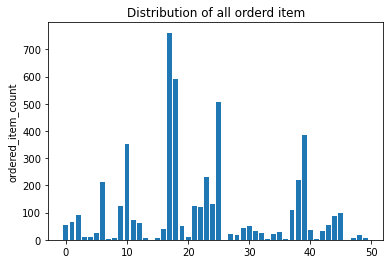

In [5]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

- [<Step4. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색](#<Step4.-탐색적-분석>-:-스무고개로-분석하는-개념적-탐색)
    - [주문당 평균 계산금액 출력하기]
    - [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]
    - [각 아이템의 가격 구하기]
    - [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]
    - [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]
    - [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]

In [6]:
# 주문당 평균 계산금액 출력하기
total_price = chipotle.groupby('order_id')['item_price'].sum()
total_price[:10]
total_price.mean

<bound method Series.mean of order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64>

- [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [15]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [16]:
chipo_orderid_group = chipotle.groupby('order_id')
chipo_orderid_group.mean()

,quantity,item_price
order_id,,
1,1.00,2.890000
10,1.00,6.600000
100,1.00,5.040000
1000,1.00,10.250000
1001,1.00,5.040000
...,...,...
995,1.00,8.316667
996,1.00,10.750000
997,2.00,22.500000


In [41]:
# chipo_one_item = chipotle[chipotle.quantity == 1]
# chipo_per_item = chipo_one_item.groupby('item_name').min()
# chipo_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40
